# Machine Learning Model

Importação das bibliotecas

In [14]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Os pacotes importados são utilizados a seguir para a modelagem dos dados tratados no notebook de Análise (Deve ser executado primeiro). A partir das features (Rooms, Date, Distance, Car, ...) devemos prever um target (Price), portanto se tratando de um modelo de *Regressão*. Além disso, serão utilizados dois tipos de testes: R2 e MSE.

In [15]:
import warnings
warnings.filterwarnings('ignore')

Remove warnings

# Carrega Base de dados Tratada

In [16]:
base = pd.read_csv("./data/base_tratada.csv", sep=";", usecols=None)
print(base.shape)
base.head()

(13580, 10)


,Unnamed: 0,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,0,2,1480000.0,2.5,1.0,1.0,202.0,-37.7996,144.9984,4019.0
1,1,2,1035000.0,2.5,1.0,0.0,156.0,-37.8079,144.9934,4019.0
2,2,3,1465000.0,2.5,2.0,0.0,134.0,-37.8093,144.9944,4019.0
3,3,3,850000.0,2.5,2.0,1.0,94.0,-37.7969,144.9969,4019.0
4,4,4,1600000.0,2.5,1.0,2.0,120.0,-37.8072,144.9941,4019.0


A base carregada é a base tratada resultante da Limpeza realizada no notebook da EDA. para aplicar um modelo de regressão. iremos escolher um método de preprocessamento das features da base. 


Percebemos que cada feature conta com unidades, extremos e escalas distintas e o modelo é sensível a tais características da base. Devemos ter como comparar as features e isso significa padronizar sua distribuição. Faremos entrão o Preprocessamento ou Redimensionamento das features da base.

## PreProcessamento da Base

Apresentamos duas maneiras de realizar o redimensionamento da base:

- [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html): Redimensiona as features para a uma escala entre 0 e 1.


- [`Stadartization`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Redimensiona os valores das features para eliminar a média (zerar) e converte as dimensões para a unidade de "desvio-padrão da média".

### Min Max Scaler

In [17]:
# cols = [col for col in base.columns if col != "Price"]
# for col in cols:
#     # find minimum and maximum of that column
#     minimum = min(base[col])
#     maximum = max(base[col])
#     base[col] = (base[col] - minimum) / (maximum - minimum)

# print(base.shape)
# base.head()

### Standardization 

In [18]:
# standardization

scalar = preprocessing.StandardScaler()

# fit our data
cols = [col for col in base.columns if col != "Price"]
scaled_cols = scalar.fit_transform(base[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,Unnamed: 0,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,-1.731923,-0.981463,-1.301485,-0.772376,-0.636847,-0.089316,0.121160,0.030640,-0.784625
1,-1.731668,-0.981463,-1.301485,-0.772376,-1.677692,-0.100843,0.016437,-0.017478,-0.784625
2,-1.731413,0.064876,-1.301485,0.673367,-1.677692,-0.106356,-0.001227,-0.007855,-0.784625
3,-1.731158,0.064876,-1.301485,0.673367,-0.636847,-0.116380,0.155226,0.016204,-0.784625
4,-1.730903,1.111216,-1.301485,-0.772376,0.403998,-0.109864,0.025269,-0.010742,-0.784625


In [19]:
for col in cols:
    base[col] = scaled_cols[col]

print(base.shape)
base.head()

(13580, 10)


,Unnamed: 0,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,-1.731923,-0.981463,1480000.0,-1.301485,-0.772376,-0.636847,-0.089316,0.121160,0.030640,-0.784625
1,-1.731668,-0.981463,1035000.0,-1.301485,-0.772376,-1.677692,-0.100843,0.016437,-0.017478,-0.784625
2,-1.731413,0.064876,1465000.0,-1.301485,0.673367,-1.677692,-0.106356,-0.001227,-0.007855,-0.784625
3,-1.731158,0.064876,850000.0,-1.301485,0.673367,-0.636847,-0.116380,0.155226,0.016204,-0.784625
4,-1.730903,1.111216,1600000.0,-1.301485,-0.772376,0.403998,-0.109864,0.025269,-0.010742,-0.784625


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>],
       [<AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

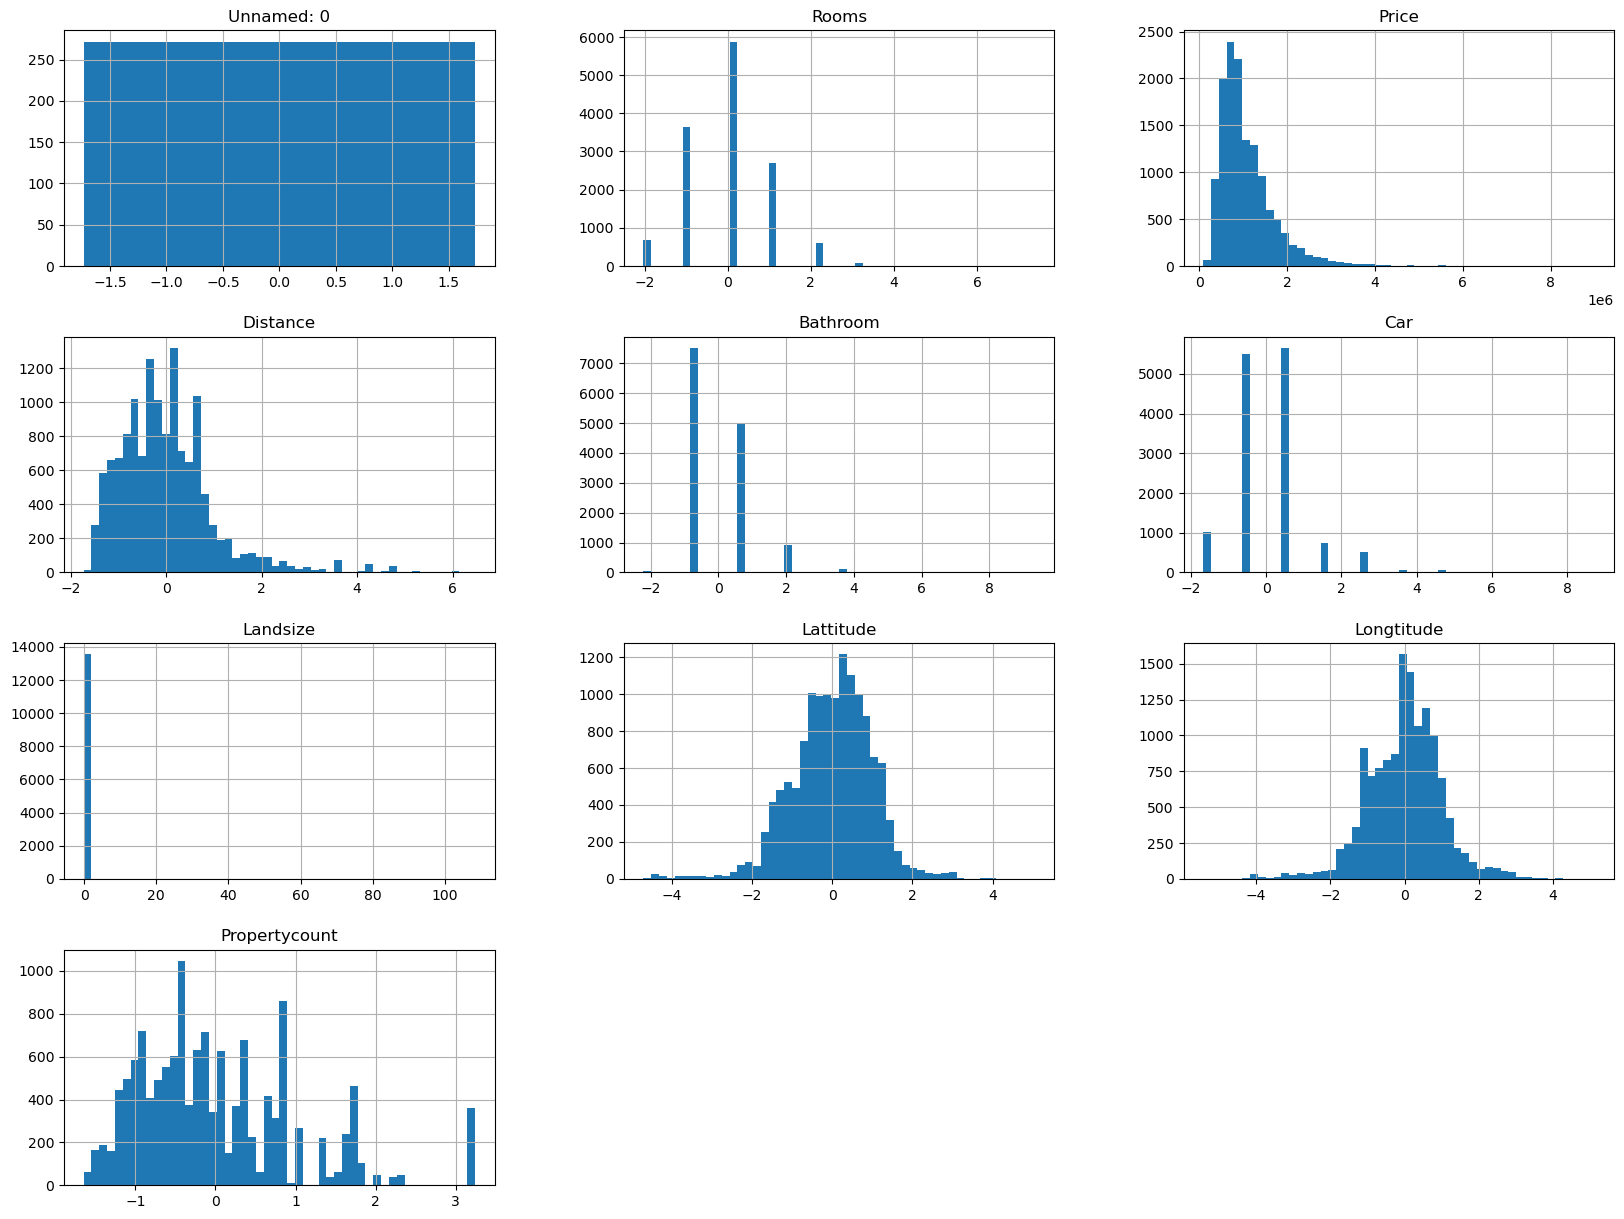

In [20]:
base.hist(bins=50, figsize=(20,15))

## Model Training

In [21]:
## Input Split

X = base.drop(columns=['Price'])
y = base['Price']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"train {x_train.shape}")
print(f"test {x_test.shape}")

train (10185, 9)
test (3395, 9)


In [23]:
x_test.head()

,Unnamed: 0,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
1061,-1.461274,0.064876,0.181004,0.673367,1.444843,0.007414,-1.507721,-0.030951,0.713632
6482,-0.078440,-0.981463,-1.403726,-0.772376,-0.636847,-0.139936,0.001296,-0.415893,-1.193220
8395,0.409545,0.064876,-0.688041,-0.772376,-1.677692,-0.139936,-0.789802,-0.178191,1.321386
4659,-0.543466,0.064876,-0.040517,0.673367,-0.636847,-0.103349,1.186051,-0.583343,0.006985
7386,0.152160,-0.981463,-0.176838,-0.772376,0.403998,-0.024161,-0.301517,-1.190589,-1.477797


### Linear Regression

R2 0.48081084505542937


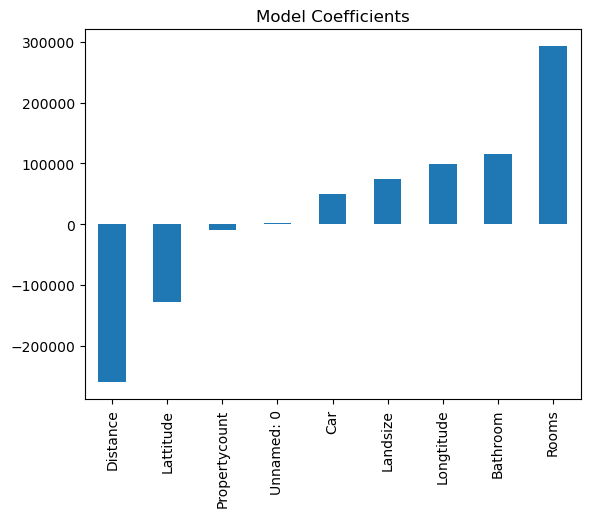

In [24]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression(normalize=True)
model_lr.fit(x_train, y_train)

pred_lr = model_lr.predict(x_test)
# mean_sqr_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)
print("R2", r2_lr)

coef_lr = pd.Series(model_lr.coef_, X.columns).sort_values()
coef_lr.plot(kind='bar', title="Model Coefficients")
plt.show()

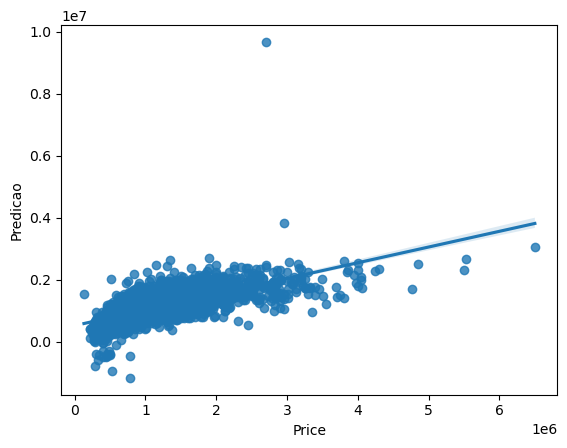

In [25]:
df_pred_lr = pd.concat([y_test.reset_index(drop=True), 
            pd.Series(pred_lr, name="Predicao")], 
            axis=1)

sns.regplot(x="Price", y="Predicao", data=df_pred_lr)
plt.show()

### Random Forest Regressor

R2 0.798491301671963


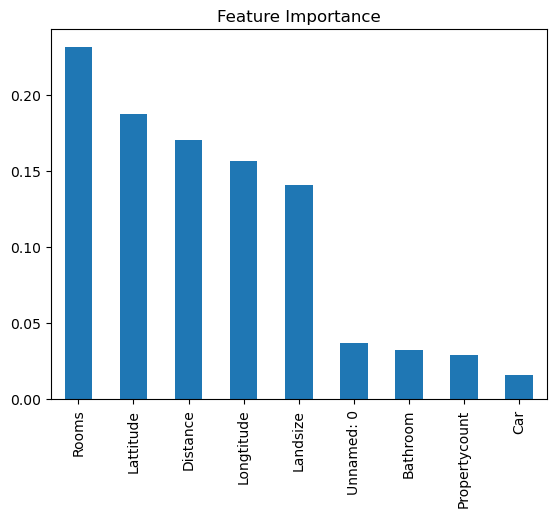

In [26]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)

pred_rfr = model_rfr.predict(x_test)
# mean_sqr_rfr = mean_squared_error(y_test, pred_rfr)
r2_rfr = r2_score(y_test, pred_rfr)
print("R2", r2_rfr)

coef_rfr = pd.Series(model_rfr.feature_importances_, X.columns).sort_values(ascending=False)
coef_rfr.plot(kind='bar', title="Feature Importance")
plt.show()

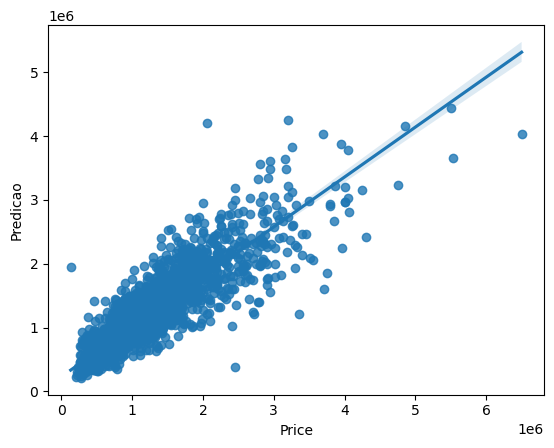

In [27]:
df_pred_rfr = pd.concat([y_test.reset_index(drop=True), 
            pd.Series(pred_rfr, name="Predicao")], 
            axis=1)

sns.regplot(x="Price", y="Predicao", data=df_pred_rfr)
plt.show()